# Aufgabe 1 - Simulationskette für Neutrinodetektor

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def phi(E):
    return 10/17*E**(-2.7)


def inverseCDFOfPhi(E):
    return (1-E)**(-10/17)


def P(E):
    return (1-np.exp(-E/2))**3

## Teilaufgabe a) - Signal MC

In [3]:
amountOfSamples = int(1e5)
np.random.seed = 42 # to get reproducable results
energyLinspace = np.linspace(1,10000,10000) # to plot the generated energy sample later on
prng = random.RandomState(42) # A mersenne twister generator
uniform1 = prng.uniform(size=amountOfSamples) # 1e5 pseudo random numbers, which are uniformly distributed in 0 to 1, 1 not included
energy = inverseCDFOfPhi(uniform1) # using inversion sampling
dfEnergy = pd.DataFrame(data=energy[0:], index=np.arange(0,amountOfSamples), columns=['Energy'])

In [4]:
#DataFrame.to_hdf('NeutrinoMC.hdf5', key='Energy', )

## Teilaufgabe b) - Akzeptanz

In [ ]:
np.random.seed = 43 # change the seed to get different numbers
uniform2 = prng.uniform(size=amountOfSamples) # a second array to perform the neumann rejection sampling
mask = uniform2 < P(energy) # a boolean array containing true, false, true, ...
# at index i the value is true, if the neutrino with energy[i] got detected successfully, otherwise the value is false.
energyDetected = energy[mask == True] # In this array only the energies of the successfully detected neutrinos are stored
dfMask = pd.DataFrame(data=mask[0:], index=np.arange(0,amountOfSamples), columns=['AcceptanceMask'])
dfTwo = pd.concat([dfEnergy,dfMask], axis=1)

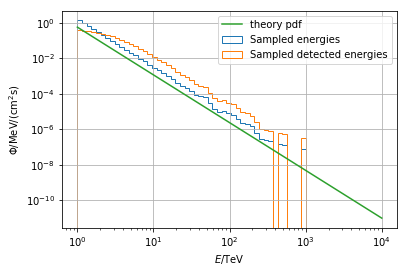

In [7]:
# Grafische Veranschaulichung
plt.hist(energy, normed=True, bins=np.logspace(0,3), label='Sampled energies', histtype='step')
plt.hist(energyDetected, normed=True, bins=np.logspace(0,3), label='Sampled detected energies', histtype='step')
plt.plot(energyLinspace, phi(energyLinspace), label='theory pdf')
plt.grid()
plt.legend()
plt.xlabel(r'$E/\mathrm{TeV}$')
plt.ylabel(r'$\Phi/\mathrm{MeV/(cm^2 s)}$')
plt.yscale('log')
plt.xscale('log')
plt.show()
pl.clf()

## Teilaufgabe c) - Energiemessung

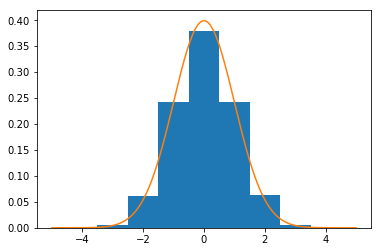

NormaltestResult(statistic=505.69539346661134, pvalue=1.5475352376922764e-110)

In [56]:
def gaussian(x, mu, sig):
    return np.exp(-(x-mu)**2/(2*sig*sig) )/ np.sqrt(2*np.pi*sig*sig)

np.random.seed = 44
gaussianArray = []
while len(gaussianArray) < 1e4:
    v1 = prng.uniform(-1,1)
    v2 = prng.uniform(-1,1)
    s = v1**2+v2**2
    if s < 1:
        temp = np.sqrt(-2/s*np.log(s))
        gaussianArray.append(v1*temp)
        gaussianArray.append(v2*temp)
#gaussianArray = np.round(gaussianArray)
#print(gaussianArray)
plt.hist(gaussianArray, bins = np.arange(-5,5)+0.5, range = [-5,5], normed=True)
x = np.linspace(-5,5,1000)
plt.plot(x, gaussian(x,0,1))
plt.show()